***
### **Trabalho Algoritmos Não-Supervisionados para clusterização**
***
##### **Aluno**: José Victor Cavalcante Azevedo
##### **Professor**: Luiz Frias
***

 Este trabalho foi realizado utilizando um ambiente virtual Anaconda. As seguintes bibliotecas foram instaladas utilizando **conda**:
 - numpy
 - scipy
 - pandas
 - matplot
 - seaborn
 - sklearn

In [1]:
import numpy as np
import scipy
import scipy.spatial

import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette = 'Set2')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

## Importação da base de dados e checagem dos dados

In [2]:
df = pd.read_csv("data/Country-data.csv", sep=',', index_col=0)
df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
Tunisia,17.4,50.5,6.21,55.3,10400,3.820,76.9,2.14,4140
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900
"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
Guatemala,35.4,25.8,6.85,36.3,6710,5.140,71.3,3.38,2830
Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327


In [3]:
pd.options.display.max_colwidth = 300

In [4]:
df_dic = pd.read_csv("data/data-dictionary.csv", sep=',', index_col=0)
df_dic

,Description
Column Name,
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services per capita. Given as %age of the GDP per capita
health,Total health spending per capita. Given as %age of GDP per capita
imports,Imports of goods and services per capita. Given as %age of the GDP per capita
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


In [5]:
print("Número total de países: ",df.index.unique().size)

Número total de países:  167


In [6]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 17.1+ KB


## Data Understanding

A base de dados consiste em dados de características socio-econômicas (PIB per capita, exportações, importações, investimento em saúde, renda per capita e inflação ) e de saúde (mortalidade infantil, expectativa de vida e taxa de fertilidade) que determinam o índice de desenvolvimento de 167 países.

Verificado que não há dados vazios ou nulos. Todos os dados são numéricos (quantitativos), não há dados categóricos (qualitativos).

A seguir observamos a média, desvio-padrão, mediana, quartis, valores máximos, mínimos, histograma e boxplot de cada parâmetro.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


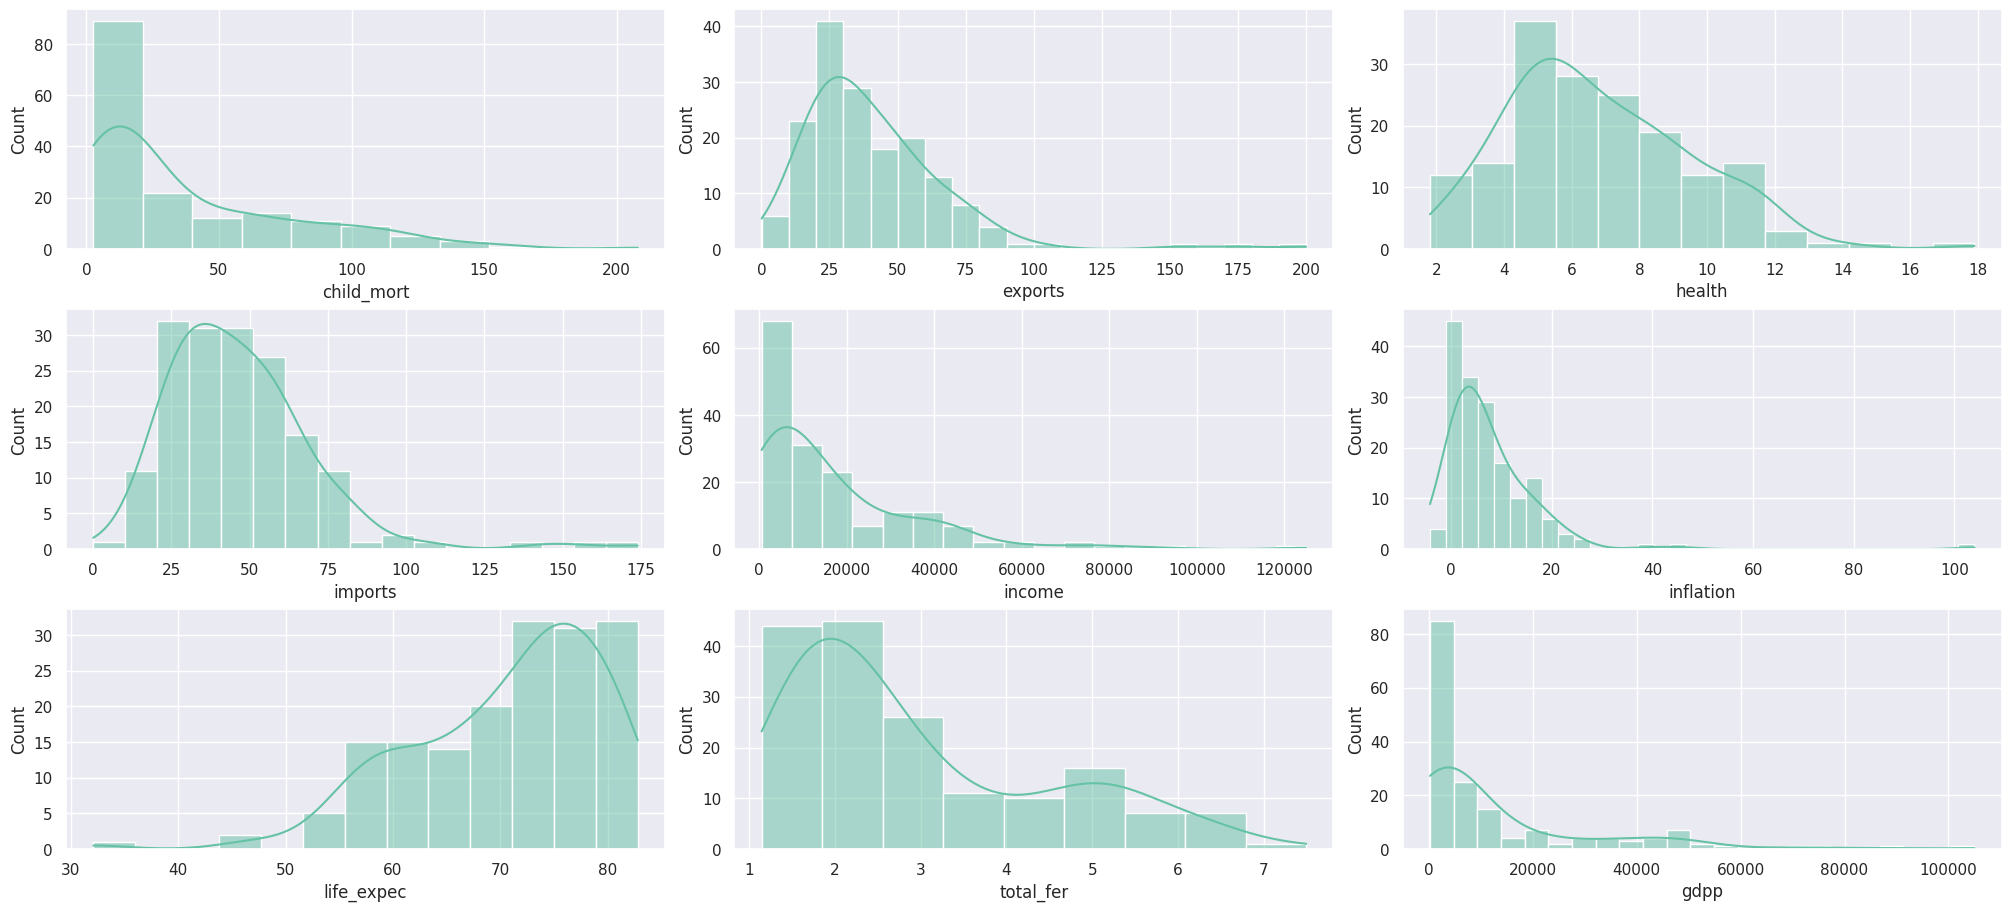

In [10]:
fig, ax = plt.subplots(3,3, figsize=(20,9), constrained_layout=True)
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(x=df[i], ax=ax[x], kde=True)

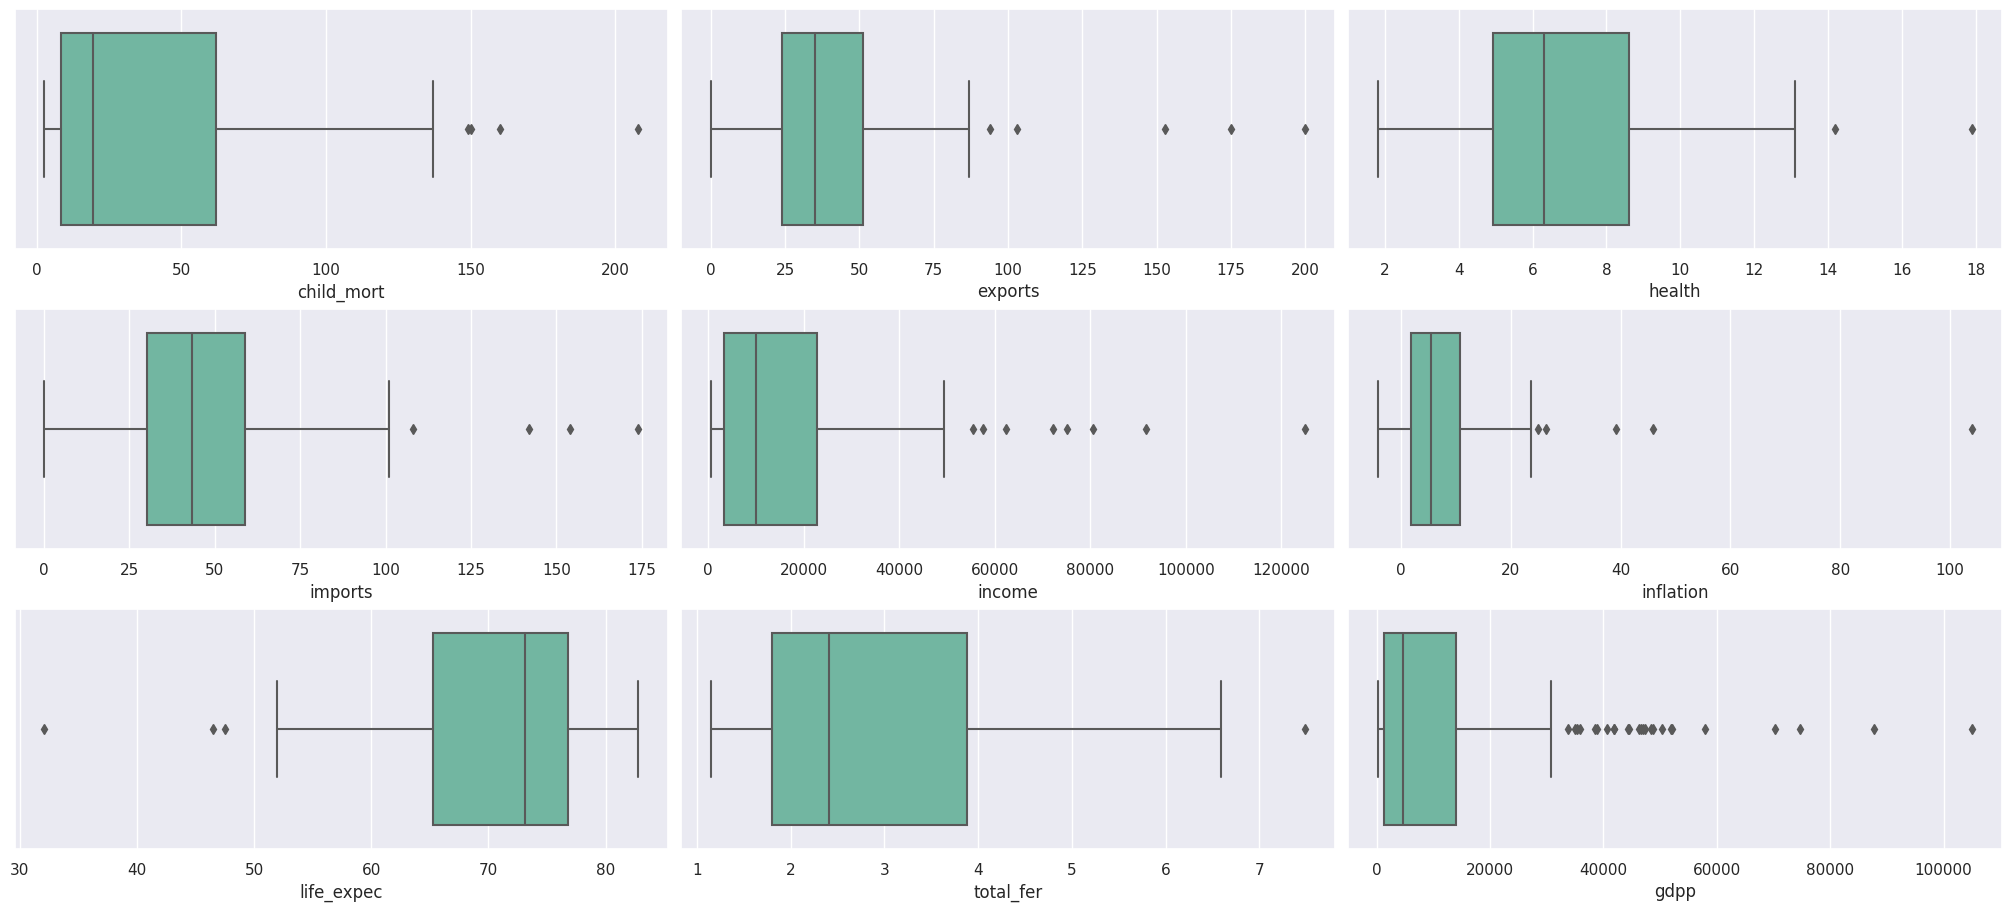

In [11]:
fig, ax = plt.subplots(3,3, figsize=(20,9), constrained_layout=True)
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x])

Obersava-se alguns 'outliers' para alguns parâmentros, sendo o PIB per capita (gdpp) e a inflação que apresentam valores 'outliers' mais expressivos.

A seguir vamos vizualizar quais são os países com esses dados:

In [12]:
df.sort_values('inflation',ascending=False).head(10)['inflation']


country
Nigeria              104.0
Venezuela             45.9
Mongolia              39.2
Timor-Leste           26.5
Equatorial Guinea     24.9
Yemen                 23.6
Sri Lanka             22.8
Angola                22.4
Argentina             20.9
Congo, Dem. Rep.      20.8
Name: inflation, dtype: float64

In [13]:
df.sort_values('gdpp',ascending=False)[0:10].head(10)['gdpp']

country
Luxembourg       105000
Norway            87800
Switzerland       74600
Qatar             70300
Denmark           58000
Sweden            52100
Australia         51900
Netherlands       50300
Ireland           48700
United States     48400
Name: gdpp, dtype: int64

Ou seja, Nigéria apresenta um inflação muito maior que os demais países e Luxemburgo o país com maior PIB per capita.

Por se tratar de uma base de multidimensional, segue a relação por par dessas caracteríscas.

In [14]:
sns.pairplot(df, corner=True)

## Data Preparation

Antes de iniciar a clusterização será realizado a padronização dos dados usando o StandardScaler. A padronização é importante como pré-processamento do k-means pois trás os valores de todas features para uma faixa próxima, desta forma,uma determinada feature não terá tanto 'peso' sobre as demais no cálculo da distância.

Apesar do k-means ser sensível a outliers, neste momento, não será tomado nenhuma ação em relação aos outliers comentado anteriormente.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df))
df_normalized.describe().T

Foi pedido para realizar clusterização em 3 cluster, mas mesmo assim, segue o gráfico do método Elbow, que ajuda a determinar um número de cluster.

In [ ]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 8)):
    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(df_normalized)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_normalized); 
visualizer.poof();

## Modeling
### Aplicando k-means

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model_fit = model.fit(df_normalized)

In [ ]:
cluster_df = df.copy()
cluster_df['kmeas_cluster'] = model.labels_
cluster_df.sample(10)

### Aplicando clusterização hierárquica

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(df_normalized)

cluster_df['hier_cluster'] = agg_model.labels_

In [ ]:
plt.figure(figsize=(15, 5))
dendrogram = sch.dendrogram(sch.linkage(df_normalized, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

### Analysis

No dendograma acima tem-se os 3 grupos e sua ramificaçoes. Com uma distância de aproximadamente 16 tem-se a formação de 3 clusters..

Abaixo visualiza-se o nome dos países clusterizados com k-means e pela classificação hierárquica. Observa-se que teve uma diferencia no número dos rótulos mas que serão renomeados.

In [ ]:
for i in range(3):
  print(f'\nCluter k-means {i}: ', cluster_df[cluster_df['kmeas_cluster']==i].index.values)
  print('Número de países: ', cluster_df['kmeas_cluster'].value_counts()[i])
  print(f'\nCluter hierarchical {i}: ', cluster_df[cluster_df['hier_cluster']==i].index.values)
  print('Número de países: ', cluster_df['hier_cluster'].value_counts()[i])

In [ ]:
cluster_df.groupby('hier_cluster').mean()

In [ ]:
cluster_df.groupby('kmeas_cluster').mean()

Analisando os dados de cada cluster acima, observa-se principalmente pela taxa de mortalidade infantil (child_mort), renda per capita (income) e PIB per capita (gdpp), uma separação expressiva. Pela natureza dos dados e resultados, pode-se classificar esses 3 grupos de países como Desenvolvidos (Developed), Em Desenvolvimento (Developing) e Subdesenvolvidos (Underdeveloped).

Segue a renomeação dos cluster e plotagens que podemos vizualizar melhor esses grupos.

In [ ]:
cluster_df['kmeas_cluster'] = cluster_df['kmeas_cluster'].map({0: 'Developed', 1: 'Underdeveloped', 2: 'Developing'})
cluster_df['hier_cluster'] = cluster_df['hier_cluster'].map({0: 'Developed', 2: 'Underdeveloped', 1: 'Developing'})

O número de países classificados (k-means):
  1. Desenvolvidos: 36
  2. Em Desenvolvimento: 84
  3. Subdesenvolvido: 47

O número de países classificados (hierárquico):
  1. Desenvolvidos: 34
  2. Em Desenvolvimento: 106
  3. Subdesenvolvido: 27


A seguir temos que 28 países tiveram classificação diferente entre os métodos.


In [ ]:
cluster_df['match']=cluster_df['kmeas_cluster']==cluster_df['hier_cluster']
cluster_df['match'].value_counts()

In [ ]:
cluster_df.loc[cluster_df['match'] == False]

Para representar o país que representa melhor cada grupo, foi considerado a menor  distância para o centro resultante calculado pelo método do k-means

Essas países são:
  1. Desenvolvidos: Islândia
  2. Em Desenvolvimento: Jamaica
  3. Subdesenvolvido: Guiné

Outra forma de determinar qual o país que melhor representa um cluster seria aplicar o método k-medoids, no qual em cada iteração escolhe um objeto, no caso um país, ao contrário de um ponto imaginário do k-means.

In [ ]:
center = model.cluster_centers_[0]
cluster_df['dist0']=0
for i in range(167):
  cluster_df['dist0'].iloc[i] = np.linalg.norm(center - np.array(df_normalized.iloc[i])) 
cluster_df

center = model.cluster_centers_[1]
cluster_df['dist1']=0
for i in range(167):
  cluster_df['dist1'].iloc[i] = np.linalg.norm(center - np.array(df_normalized.iloc[i])) 
cluster_df

center = model.cluster_centers_[2]
cluster_df['dist2']=0
for i in range(167):
  cluster_df['dist2'].iloc[i] = np.linalg.norm(center - np.array(df_normalized.iloc[i]))

In [ ]:
cluster_df.sort_values('dist0')[:1]

In [ ]:
cluster_df.sort_values('dist1')[:1]

In [ ]:
cluster_df.sort_values('dist2')[:1]

In [ ]:
df['kmeas_cluster'] = cluster_df['kmeas_cluster'].values
df['hier_cluster'] = cluster_df['hier_cluster'].values

### Visualização dos Clusters k-means

In [ ]:
g = sns.pairplot(df, hue='kmeas_cluster', diag_kind='kde', corner=True)
_ = g.map_lower(sns.kdeplot, levels=1, color=".2")

### Visualização dos Clusters Hierárquico

In [ ]:
g = sns.pairplot(df, hue='hier_cluster', diag_kind='kde', corner=True)
_ = g.map_lower(sns.kdeplot, levels=1, color=".2")

### Visualização dos cluster por pares que tem uma representação visual clara.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot( x='child_mort', y='health', hue = 'kmeas_cluster' ,data = cluster_df, palette='Set2', ax=axs[0])
axs[0].set_title('Cores segundo k-means')
sns.scatterplot( x='child_mort', y='health', hue = 'hier_cluster' ,data = cluster_df, palette='Set2', ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot( x='income', y='child_mort', hue = 'kmeas_cluster' ,data = cluster_df, palette='Set2', ax=axs[0])
axs[0].set_title('Cores segundo k-means')
sns.scatterplot( x='income', y='child_mort', hue = 'hier_cluster' ,data = cluster_df, palette='Set2', ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot( x='gdpp', y='health', hue = 'kmeas_cluster' ,data = cluster_df, palette='Set2', ax=axs[0])
axs[0].set_title('Cores segundo k-means')
sns.scatterplot( x='gdpp', y='health', hue = 'hier_cluster' ,data = cluster_df, palette='Set2', ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

### Visualização dos cluster por pares que não tem uma representação visual clara. *Investimento em Saúde x Importação*

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot( x='imports', y='health', hue = 'kmeas_cluster' ,data = cluster_df, palette='Set2', ax=axs[0])
axs[0].set_title('Cores segundo k-means')
sns.scatterplot( x='imports', y='health', hue = 'hier_cluster' ,data = cluster_df, palette='Set2', ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot( x='life_expec', y='health', hue = 'kmeas_cluster' ,data = cluster_df, palette='Set2', ax=axs[0])
axs[0].set_title('Cores segundo k-means')
sns.scatterplot( x='life_expec', y='health', hue = 'hier_cluster' ,data = cluster_df, palette='Set2', ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

### Visualização por PCA

A seguir é aplicado PCA para reduzir a dimensionalidade do conjunto de dados para 2 e visualizado a classificação já realizado anteriormente

In [ ]:
def plot_cluster_points(df, labels, ax=None):
  pca = PCA(2) 
  pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
  pca_data['cluster'] = pd.Categorical(labels)
  sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_cluster_points(df_normalized,cluster_df['kmeas_cluster'].values, ax=axs[0])
axs[0].set_title('Cores segundo k-means')
plot_cluster_points(df_normalized, cluster_df['hier_cluster'].values, ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

# Escolha de algoritmos:

##### 1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
   1. Primeiro, precisa-se definir um ‘*K*’, ou seja, um número de clusters;
   2. Depois, precisa-se definir, aleatoriamente, um centroide para cada cluster;
   3. O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo;
   4. Agora, deve-se reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
   5. Os dois últimos passos são repetidos, iterativamente até um limite de iterações ou que os centróides não se desloquem mais do que um valor mínimo determinado.
     
##### 2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo. *Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.*
   Como descrito no enunciado, a centróide é o baricentro de um cluster, não sendo necessariamente um dado concreto e sim um ponto no espaço. Uma variação do K-means é o K-metóide ou PAM (Partitioning Around Medoids), no qual um cluster sempre vai ser representado por um dado real. Um medoid pode ser definido como o objeto de um cluster cuja dissimilaridade média para todos os objetos no cluster é mínima, ou seja, é um ponto localizado mais centralmente no cluster.
   1. Primeiro, precisa-se definir um ‘*K*’, ou seja, um número de clusters;
   2. Depois, precisa-se definir, aleatoriamente, um objeto para cada cluster;
   3. O próximo passo é calculara matriz de dissimilaridade. E atribuir cada objeto ao metóide mais próximo;
   4. Agora, deve-se escolher o novo metóide do cluster aquele que diminui a o coeficiente de dissimilaridade.
   5. Os dois últimos passos são repetidos, iterativamente até um limite de iterações ou que não haja mais alterações dos metóides.

##### 3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
   Sim, uma das desvantagens do K-means é o fato de ser sensível a outliers. Isso deve-se ao fato de ser baseado em média e a presença de outliers causam uma distorção no cálculo da centróide.
   
##### 4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?
   O princípio do DBScan *(Density-Based Spatial Clustering and Application with Noise)*, como o próprio nome sugere, é baseado em densidade. Seu algoritmo não necessita que se determine um número *k* de clusters, por meio de cálculo de uma densidade dos dados próximos a partir de uma distância pre-determinada esse algorítimo cria clusters por meio dessa característica, dessa forma *'outliers'* serão considerado como ruídos e serão ignorados.